## Superior movie search

This point of this project is to help a user struggling to choose a specific streaming service to watch movies.Through inputing the genre of movies the user can gets a recommendation of the 5 best streaming services with the best rated movies in that genre.

The project utilises the [watchmode api](https://api.watchmode.com/docs/#title-sources) which is the most complete API for finding out what movies & shows are available on each streaming service.In this project we will be using a number of end points from the Watchmode API service:
* We will use the `list_title` api endpoint to get the title ids of all movies in the (Netflix,Hbo,Amazon,Hulu,disney plus) streaming services
* We will then use the `title` api endpoint to get the details of all the movies we got in step one.Step one is pivotal because it provides us with the ids of movies which we use in this step
* We will then combine all the movies from all the 5 streaming services into one file `movie_details_list.txt` while appending every movie with a key of its `source`
* We will then use genres to analyse  which streaming services have the best rated movies in
    

#                                          DATA COLLECTION
### STEP ONE
Our first step will be fetching movie ids from various streaming services and storing the data in text files.We will get movies ids from 5 major services(Netflix,HBO,Amazon,Hulu,Disney plus).By the end of this step we will have 5 files, each having movies from all the 5 mentioned streaming services. To achieve this we will use two functions.The `fetch_and_write_title_ids_to_file` which writes data on files.It calls the `fetch_list_title_data` function which then makes a call to the watchmode API service.Once we get the data, we then store the data in files using the `fetch_and_write_title_ids_to_file` function. The `fetch_and_write_title_ids_to_file` takes in one paremeter which is the id of the streaming source.In this case 243 is the id of Netflix streaming service on the watchmode api

In [ ]:
from api import fetch_list_title_data,fetch_and_write_title_ids_to_file
title_data=fetch_and_write_title_ids_to_file("243")

### Output
The outputs are file are 5 files `netflix.txt`, `hbomax.txt`,`amazon.txt`,`hulu.txt`,`disney.txt` 

### STEP TWO
Our second step will involve getting the details of of every movie we fetched in our first step.We will use the `fetch_title_details` function.Through iterating over the five files we got in our first step we get the first data on the first 200 movies.The reason we choose 200 movies is because of the limitations of the the watchmode api service.It allows 1000 requests per month from a single api key.With that in mind, we need to interate over the five files and for each interation get the title id and use the  watchmode `title` api to get the details of that id.We do 1000 iterations over the whole process and thus exhaust our api key's requests.

In [ ]:
from api import save_title_details_data,fetch_title_details
movie_details=save_title_details_data("amazon.txt","Amazon Prime")


### Output
The outputs are five files `amazontitles.txt`, `amazontitles.txt`,`hbotitles.txt`,`hulutitles`,`disneytitles.txt`

### STEP THREE
Our third step will involve combining data from all the five texts files created in step two.We will combine all the data into one text file `movie_details_list.txt`


In [ ]:
from api import merge_files,
merged_files=merge_files("disneyplustitles.txt", "amazontitles.txt", "netflixtitles.txt", "hbomaxtitles.txt", "hulutitles.txt")


### Output
The output is one file containing data on all the titles from all the 5 sources

# DATA ANALYSIS
In this step we will begin our analysis of the data we have collected above.We will write functions to analyse the best rated movies based on genre and streaming service.

The first way in which we wanted to analyze the greatness of the streaming services is in how good their movies are. However, every person has a different preference in the type of movies they would like to watch, and thus ratings within some genres matter more than others. Therefore, we decided to explore the quality of each service's movies per genre. In the following code block, we created a function `get_genre_ratings`that will return the average rating for a specific genre within a specific streaming service. Then, using this function, we created a bar plot that showed the average rating for a specific genre for all of the top 5 streaming services.

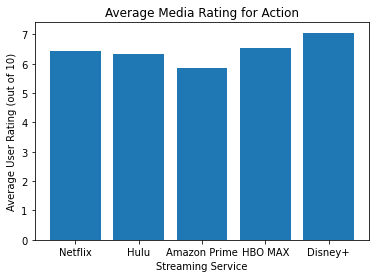

In [4]:
import api

api.bar_plot_genre_ratings("Action")

The function `bar_plot_genre_ratings` takes the desired genre and analyzes data from that genre, therefore making it easy to personalize the data for your own priorities. For example, I tend to like action movies the most, so I searched for the streaming service that has the best action movies. The graph shows that Disney Plus tends to have better action media than the rest of the streaming services (which makes sense, given that they own Marvel and Star Wars). However, for a horror fan, Disney Plus would fall short, as they have no horror movies at all. 

Feel free to experiment with different genres with the above function to see which streaming service is best for your favourite genre. To see the list of valid genres, run the following code block:

In [ ]:
api.genres_list()